***Logistic Regression***

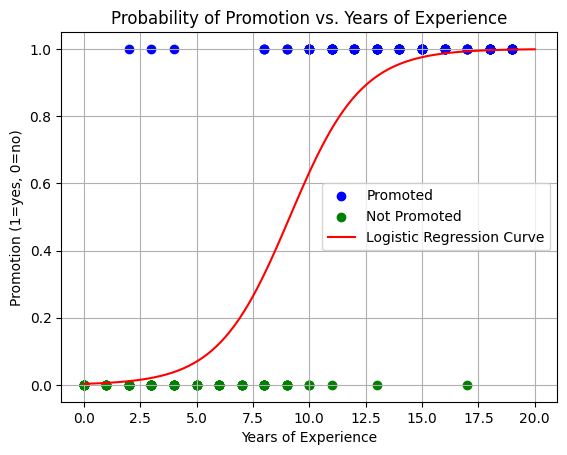

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Generating synthetic data
np.random.seed(0)
years_experience = np.random.randint(0, 20, size=200)

promotion_probability = 1 / (1 + np.exp(-1*(years_experience - 10))) + np.random.normal(0, 0.05, size=200)
# Ensure promotion probabilities are within [0, 1]
promotion_probability = np.clip(promotion_probability, 0, 1)
promotion = np.random.binomial(1, promotion_probability)

# Reshape data
years_experience = years_experience.reshape(-1, 1)

# Fit logistic regression model
model = LogisticRegression(solver='lbfgs')
model.fit(years_experience, promotion)

# Plot the data
plt.scatter(years_experience[promotion==1], promotion[promotion==1], color='blue', label='Promoted')
plt.scatter(years_experience[promotion==0], promotion[promotion==0], color='green', label='Not Promoted')

# Plot the logistic regression curve
x_values = np.linspace(0, 20, 100)
y_values = model.predict_proba(x_values.reshape(-1, 1))[:, 1]
plt.plot(x_values, y_values, color='red', label='Logistic Regression Curve')

plt.xlabel('Years of Experience')
plt.ylabel('Promotion (1=yes, 0=no)')
plt.title('Probability of Promotion vs. Years of Experience')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Generate test data
test_years_experience = np.random.randint(0, 20, size=1000)
test_promotion_probability = 1 / (1 + np.exp(-1*(test_years_experience - 10))) + np.random.normal(0, 0.05, size=1000)
test_promotion_probability = np.clip(test_promotion_probability, 0, 1)
test_promotion = np.random.binomial(1, test_promotion_probability)

# Reshape test data
test_years_experience = test_years_experience.reshape(-1, 1)

# Predict probabilities using the trained model
test_predicted_proba = model.predict_proba(test_years_experience)[:, 1]

# Define threshold values
threshold_values = np.linspace(0, 1, 100)

# Calculate precision and recall for each threshold
precisions = []
recalls = []
for threshold in threshold_values:
    predicted_promotion = (test_predicted_proba >= threshold).astype(int)
    true_positives = np.sum((predicted_promotion == 1) & (test_promotion == 1))
    false_positives = np.sum((predicted_promotion == 1) & (test_promotion == 0))
    false_negatives = np.sum((predicted_promotion == 0) & (test_promotion == 1))

    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0

    precisions.append(precision)
    recalls.append(recall)

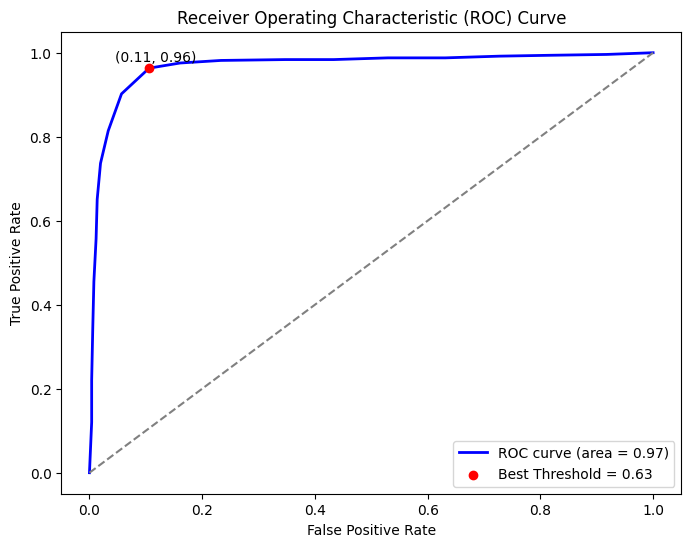

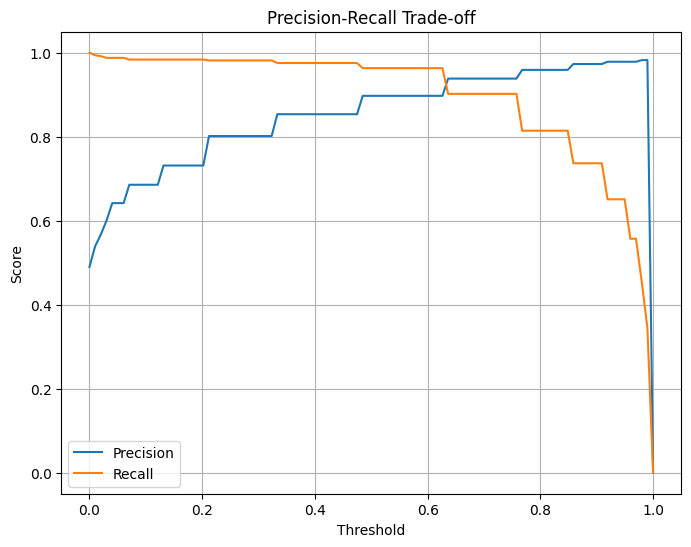

In [ ]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve
fpr, tpr, thresholds_roc = roc_curve(test_promotion, test_predicted_proba)
roc_auc = auc(fpr, tpr)

# Calculate the difference between TPR and FPR for each threshold
tpr_minus_fpr = tpr - fpr

# Find the index of the threshold with the maximum TPR-FPR difference
best_threshold_index = np.argmax(tpr_minus_fpr)

# Find the corresponding threshold value
best_threshold_roc = thresholds_roc[best_threshold_index]

# Plot ROC curve with annotation for best threshold
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.scatter(fpr[best_threshold_index], tpr[best_threshold_index], color='red', label=f'Best Threshold = {best_threshold_roc:.2f}', zorder=5)
plt.annotate(f'({fpr[best_threshold_index]:.2f}, {tpr[best_threshold_index]:.2f})',
             (fpr[best_threshold_index], tpr[best_threshold_index]),
             textcoords="offset points",
             xytext=(5,5),
             ha='center')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Plot precision-recall trade-off
plt.figure(figsize=(8, 6))
plt.plot(threshold_values, precisions, label='Precision')
plt.plot(threshold_values, recalls, label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall Trade-off')
plt.legend()
plt.grid(True)

plt.show()

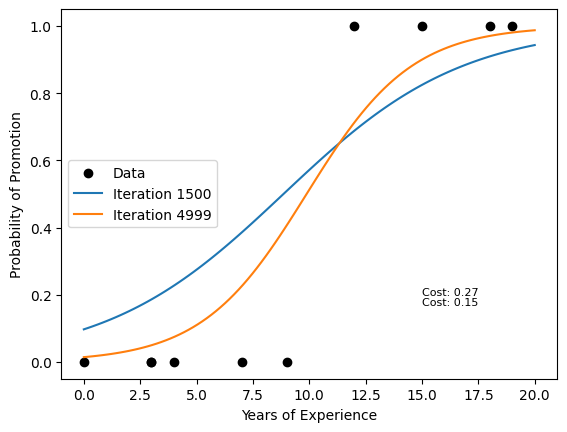

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define cost function for logistic regression
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    cost = (-1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

# Define gradient descent function
def gradient_descent(X, y, theta, learning_rate, num_iterations):
    m = len(y)
    costs = []
    thetas = []
    for _ in range(num_iterations):
        h = sigmoid(np.dot(X, theta))
        gradient = np.dot(X.T, (h - y)) / m
        theta -= learning_rate * gradient
        thetas.append(theta.copy())  # Append a copy of theta
        costs.append(compute_cost(X, y, theta))
    return thetas, costs

# Generating synthetic data
np.random.seed(0)
years_experience = np.random.randint(0, 20, size=10)

promotion_probability = 1 / (1 + np.exp(-1*(years_experience - 10))) + np.random.normal(0, 0.05, size=10)
# Ensure promotion probabilities are within [0, 1]
promotion_probability = np.clip(promotion_probability, 0, 1)
promotion = np.random.binomial(1, promotion_probability)

# Reshape data
years_experience = years_experience.reshape(-1, 1)

# Add intercept term to features
X = np.hstack((np.ones((years_experience.shape[0], 1)), years_experience))

theta_initial = np.zeros(X.shape[1])

learning_rate = 0.01
num_iterations = 5000

# Plot the data
plt.scatter(years_experience, promotion, color='black', label='Data')

# Run gradient descent to optimize parameters
thetas, costs = gradient_descent(X, promotion, theta_initial, learning_rate, num_iterations)

# Select 5 iterations to show
iterations_to_show = [1500, 4999]

x_values = np.linspace(0, 20, 100)

for i in iterations_to_show:
    y_values_iter = sigmoid(thetas[i][0] + thetas[i][1] * x_values)
    plt.plot(x_values, y_values_iter, label=f'Iteration {i}')
    plt.text(15, 0.2 - 0.03 * iterations_to_show.index(i), f'Cost: {costs[i]:.2f}', fontsize=8)

plt.xlabel('Years of Experience')
plt.ylabel('Probability of Promotion')
plt.legend(loc='center left')
plt.show()

***Example with the IRIS dataset***

In [ ]:
from sklearn import datasets

iris = datasets.load_iris()

list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [ ]:
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
X = iris["data"][:, 3:] # petal width

In [ ]:
iris["target"]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
y = (iris["target"] == 2).astype(int) # 1 if Iris-Virginica, else 0

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

In [ ]:
print(X.min())
print(X.max())

0.1
2.5


***Decision Boundary***

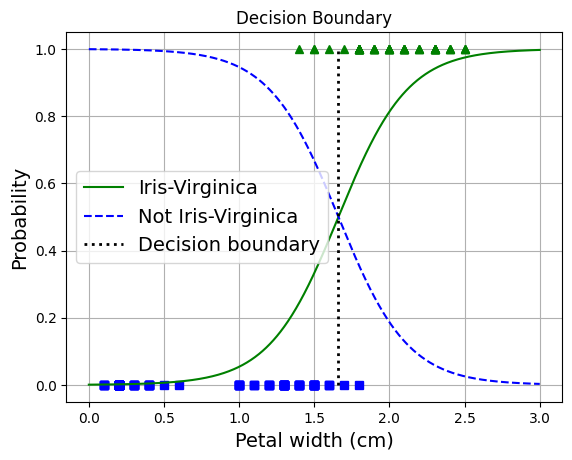

In [ ]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

# Plot the data
plt.plot(X[y == 0], y[y == 0], "bs")
plt.plot(X[y == 1], y[y == 1], "g^")

plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")

plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2,
         label="Decision boundary")

plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.title("Decision Boundary")
plt.legend(loc="center left", fontsize=14)
plt.grid()
plt.show()

***Two features***

In [ ]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(int) # 1 if Iris-Virginica, else 0

log_reg2 = LogisticRegression()
log_reg2.fit(X, y)

LogisticRegression()

In [ ]:
print("Petal Length")
print(X[:,0].min())
print(X[:,0].max())

print("Petal Width")
print(X[:,1].min())
print(X[:,1].max())

Petal Length
1.0
6.9
Petal Width
0.1
2.5


In [ ]:
a = np.linspace(0, 3, 1000).reshape(-1, 1) #Petal width
b = np.linspace(1, 7, 1000).reshape(-1, 1) #Petal length

X_new2 = np.column_stack((a, b))

y_proba2 = log_reg2.predict_proba(X_new2)

In [ ]:
# for the decision boundary
left_right = np.array([1, 7])
boundary = -((log_reg2.coef_[0, 0] * left_right + log_reg2.intercept_[0])
             / log_reg2.coef_[0, 1])

In [ ]:
boundary

array([ 6.19172533, -0.79448756])

In [ ]:
log_reg2.coef_[0, 0]

2.7776252366029897

In [ ]:
log_reg2.intercept_[0]

-17.54811060091075

In [ ]:
log_reg2.coef_[0, 1]

2.3855201205956105

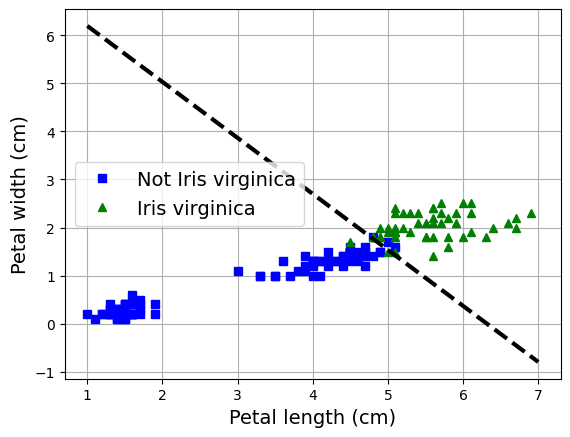

In [ ]:
# Plot the data
plt.plot(X[y == 0, 0], X[y == 0, 1], "bs", label="Not Iris virginica")
plt.plot(X[y == 1, 0], X[y == 1, 1], "g^", label="Iris virginica")

plt.plot(left_right, boundary, "k--", linewidth=3)

plt.xlabel("Petal length (cm)", fontsize=14)
plt.ylabel("Petal width (cm)", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.grid()
plt.show()

Scikit-learn Logistic Regression model uses ***one-versus-all*** by default when you train with more than two classes.

***Three Features***

In [ ]:
X = iris["data"][:, (0, 2, 3)]  # sepal length, petal length, petal width
y = (iris["target"] == 2).astype(int) # 1 if Iris-Virginica, else 0

log_reg3 = LogisticRegression()
log_reg3.fit(X, y)

LogisticRegression()

In [ ]:
print("Sepal Length")
print(X[:,0].min())
print(X[:,0].max())

print("Petal Length")
print(X[:,1].min())
print(X[:,1].max())

print("Petal Width")
print(X[:,2].min())
print(X[:,2].max())

Sepal Length
4.3
7.9
Petal Length
1.0
6.9
Petal Width
0.1
2.5


In [ ]:
a = np.linspace(4, 8, 1000).reshape(-1, 1) #Sepal length
b = np.linspace(0, 3, 1000).reshape(-1, 1) #Petal width
c = np.linspace(1, 7, 1000).reshape(-1, 1) #Petal length

X_new3 = np.column_stack((a, b, c))

y_proba3 = log_reg3.predict_proba(X_new3)

In [ ]:
import numpy as np
import plotly.graph_objects as go
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

# Load iris dataset
iris = datasets.load_iris()
X = iris["data"][:, (0, 2, 3)]  # sepal length, petal length, petal width
y = (iris["target"] == 2).astype(int)  # 1 if Iris-Virginica, else 0

# Fit logistic regression model
log_reg3 = LogisticRegression()
log_reg3.fit(X, y)

# Generate new data points
a = np.linspace(4, 8, 100)
b = np.linspace(0, 3, 100)
a, b = np.meshgrid(a, b)
c = (-log_reg3.intercept_[0] - log_reg3.coef_[0][0] * a - log_reg3.coef_[0][2] * b) / log_reg3.coef_[0][1]

# Plot 3D figure
fig = go.Figure(data=[
    go.Surface(z=c, x=a, y=b, colorscale='RdBu', opacity=0.8, showscale=False),
    go.Scatter3d(x=X[:, 0], y=X[:, 2], z=X[:, 1], mode='markers', marker=dict(color=y, size=5))
])

fig.update_layout(scene=dict(
    xaxis_title='Sepal length',
    yaxis_title='Petal width',
    zaxis_title='Petal length',
))
fig.show()

***SoftMax Regression***

In [ ]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

In [ ]:
softmax_reg.predict([[2.5, 6], [1.5, 2.4]])

array([2, 0])

In [ ]:
softmax_reg.predict_proba([[2.5, 6], [1.5, 2.4]])

array([[1.19632366e-08, 1.05312655e-08, 9.99999978e-01],
       [9.94358431e-01, 5.64114920e-03, 4.19534353e-07]])

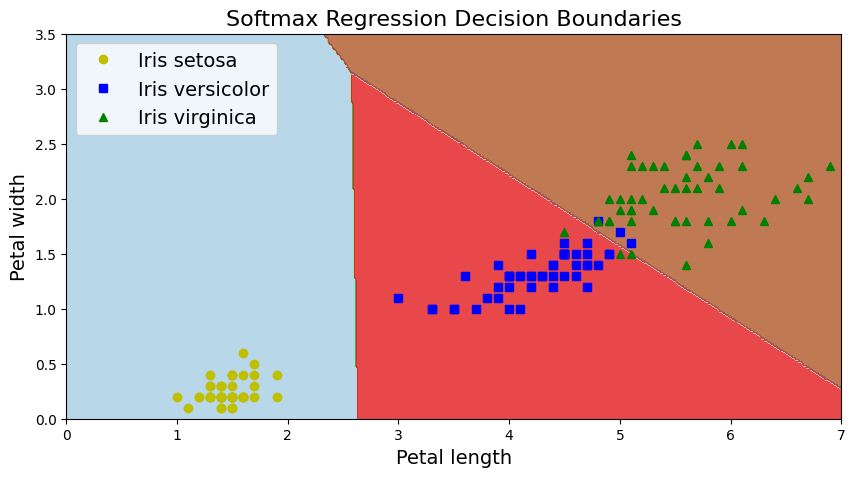

In [ ]:
# Define a grid of points covering the feature space
x0, x1 = np.meshgrid(
    np.linspace(0, 7, 500).reshape(-1, 1),
    np.linspace(0, 3.5, 200).reshape(-1, 1),
)
X_new = np.c_[x0.ravel(), x1.ravel()]

# Predict class probabilities for each point on the grid
y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)
zz1 = y_proba[:, 1].reshape(x0.shape)  # Probability for class 1
zz = y_predict.reshape(x0.shape)  # Predicted class

# Plot the decision boundaries
plt.figure(figsize=(10, 5))
plt.contourf(x0, x1, zz, cmap=plt.cm.Paired, alpha=0.8)

# Plot the classes
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")

plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("Softmax Regression Decision Boundaries", fontsize=16)

plt.show()

***Naive Bayes***

In [ ]:
# Generate non-spam messages
non_num_spam = 90
non_spam_messages = {
    'dear': 200,
    'friend': 150,
    'work': 160,
    'money': 24,
    'click': 26,
    'prize': 17
}

# Generate spam messages
num_spam = 10
non_spam_messages = {
    'dear': 4,
    'friend': 11,
    'work': 12,
    'money': 30,
    'click': 32,
    'prize': 26
}

p_spam = 0.1 # 10/100 --> P(s)
p_non_spam = 0.9 # 90/100 --> P(n)

p_dear_non_spam = 0.35 # 200/577 --> P(dear|N)
P_friend_non_spam = 0.26 # 150/577 --> P(friend|N)
p_work_non_spam = 0.28 # 160/577 --> P(work|N)
p_money_non_spam = 0.04 # 24/577 --> P(money|N)
p_click_non_spam = 0.05 # 26/577 --> P(click|N)
p_prize_non_spam = 0.02 # 17/577 --> P(prize|N)

p_dear_spam = 0.03 # 4/115 --> P(dear|S)
P_friend_spam = 0.1 # 11/115 --> P(friend|S)
p_work_spam = 0.11 # 12/115 --> P(work|S)
p_money_spam = 0.26 # 30/115 --> P(money|S)
p_click_spam = 0.28 # 32/115 --> P(click|S)
p_prize_spam = 0.22 # 26/115 --> P(prize|S)

message = 'click money prize'

# Does message is spam or not spam?
# P(S|message) vs P(N|message) --> choose the max one!

# P(S|message) = P(S) * P(click|S) * P(money|S) * P(prize|S)
p_spam_message = p_spam * p_click_spam * p_money_spam * p_prize_spam

# P(N|message) = P(N) * P(click|N) * P(money|N) * P(prize|N)
p_non_spam_message = p_non_spam * p_click_non_spam * p_money_non_spam * p_prize_non_spam

print(p_spam_message)
print(p_non_spam_message)

if p_spam_message > p_non_spam_message:
  print("The message is SPAM!!!")
else:
  print("The message is NORMAL!")

0.0016016000000000001
3.6e-05
The message is SPAM!!!


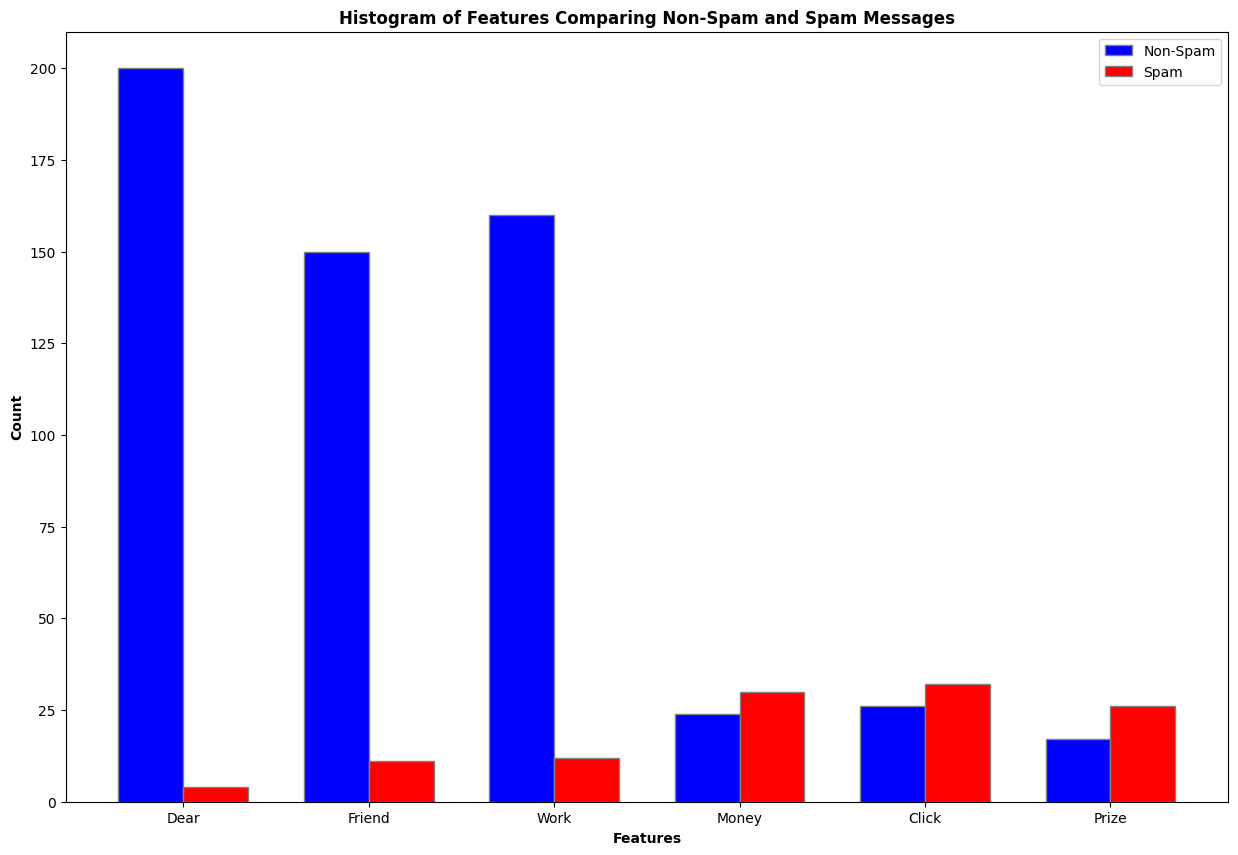

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define feature names
features = ['dear', 'friend', 'work', 'money', 'click', 'prize']

# Define values for non-spam and spam messages
non_spam_counts = [200, 150, 160, 24, 26, 17]
spam_counts = [4, 11, 12, 30, 32, 26]

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
r1 = np.arange(len(features))
r2 = [x + bar_width for x in r1]

# Plot histograms
plt.figure(figsize=(15, 10))
for i, (feature, non_spam_count, spam_count) in enumerate(zip(features, non_spam_counts, spam_counts)):
    plt.bar(r1[i], non_spam_count, color='blue', width=bar_width, edgecolor='grey', label='Non-Spam' if i == 0 else None)
    plt.bar(r2[i], spam_count, color='red', width=bar_width, edgecolor='grey', label='Spam' if i == 0 else None)

# Add xticks on the middle of the group bars
plt.xlabel('Features', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(features))], [feature.capitalize() for feature in features])

# Add ylabel and title
plt.ylabel('Count', fontweight='bold')
plt.title('Histogram of Features Comparing Non-Spam and Spam Messages', fontweight='bold')

# Add legend
plt.legend()

# Show plot
plt.show()

In [ ]:
import pandas as pd

np.random.seed(42)

# Define the size of the dataset
num_samples = 1000

# Generate synthetic data for blood pressure (systolic and diastolic)
systolic_pressure = np.random.uniform(90, 180, num_samples)
diastolic_pressure = np.random.uniform(60, 120, num_samples)

# Generate synthetic data for BMI
bmi = np.random.uniform(18, 35, num_samples)

# Introduce correlation between features and target variable
# Set heart problem to 1 if at least two out of three features exceed thresholds
heart_problem = np.zeros(num_samples, dtype=int)
for i in range(num_samples):
    count = 0
    if systolic_pressure[i] > 140:
        count += 1
    if diastolic_pressure[i] > 90:
        count += 1
    if bmi[i] > 25:
        count += 1
    if count >= 2:
        heart_problem[i] = 1

# Create a DataFrame to hold the data
data = pd.DataFrame({
    'Systolic Pressure': systolic_pressure,
    'Diastolic Pressure': diastolic_pressure,
    'BMI': bmi,
    'Heart Problem': heart_problem
})

In [ ]:
data.head(10)

,Systolic Pressure,Diastolic Pressure,BMI,Heart Problem
0,123.708611,71.107976,22.448997,0
1,175.564288,92.514057,22.198640,1
2,155.879455,112.376750,33.406328,1
3,143.879264,103.933493,22.242285,1
4,104.041678,108.393669,22.623145,0
5,104.039507,99.527002,30.909770,1
6,95.227525,101.536594,25.645577,1
7,167.955853,110.951739,31.204079,1
8,144.100351,74.980081,19.111225,0
9,153.726532,89.365498,26.288710,1


In [ ]:
#Check if the patient has a hearth problem or not
instance = [145.67, 86.4, 24.2] #--> you should predict as healthy

heart_problem_counts = data['Heart Problem'].value_counts()

# Separate instances with heart problems
heart_problem_df = data[data['Heart Problem'] == 1]

# Separate instances without heart problems
no_heart_problem_df = data[data['Heart Problem'] == 0]

p_healthy = heart_problem_counts[0] / (heart_problem_counts[0] + heart_problem_counts[1]) # --> P(H)
p_non_healthy = heart_problem_counts[1] / (heart_problem_counts[0] + heart_problem_counts[1]) # --> P(N)


#Find mean and std for Normal Distribution (Systolic Pressure)
mean_non_healthy_systolic = heart_problem_df['Systolic Pressure'].mean()
std_non_healthy_systolic = heart_problem_df['Systolic Pressure'].std()

mean_healthy_systolic = no_heart_problem_df['Systolic Pressure'].mean()
std_healthy_systolic = no_heart_problem_df['Systolic Pressure'].std()


#Find mean and std for Normal Distribution (Diastolic Pressure)
mean_non_healthy_diastolic = heart_problem_df['Diastolic Pressure'].mean()
std_non_healthy_diastolic = heart_problem_df['Diastolic Pressure'].std()

mean_healthy_diastolic = no_heart_problem_df['Diastolic Pressure'].mean()
std_healthy_diastolic = no_heart_problem_df['Diastolic Pressure'].std()


#Find mean and std for Normal Distribution (BMI)
mean_non_healthy_bmi = heart_problem_df['BMI'].mean()
std_non_healthy_bmi = heart_problem_df['BMI'].std()

mean_healthy_bmi = no_heart_problem_df['BMI'].mean()
std_healthy_bmi = no_heart_problem_df['BMI'].std()


#Probabilities for Systolic
p_non_healthy_systolic = (1/(std_non_healthy_systolic * np.sqrt(2 * np.pi))) * np.exp(-(instance[0] - mean_non_healthy_systolic)**2 / (2 * std_non_healthy_systolic**2))

p_healthy_systolic = (1/(std_healthy_systolic * np.sqrt(2 * np.pi))) * np.exp(-(instance[0] - mean_healthy_systolic)**2 / (2 * std_healthy_systolic**2))


#Probabilities for Diastolic
p_non_healthy_diastolic = (1/(std_non_healthy_diastolic * np.sqrt(2 * np.pi))) * np.exp(-(instance[1] - mean_non_healthy_diastolic)**2 / (2 * std_non_healthy_diastolic**2))

p_healthy_diastolic = (1/(std_healthy_diastolic * np.sqrt(2 * np.pi))) * np.exp(-(instance[1] - mean_healthy_diastolic)**2 / (2 * std_healthy_diastolic**2))


#Probabilities for BMI
p_non_healthy_bmi = (1/(std_non_healthy_bmi * np.sqrt(2 * np.pi))) * np.exp(-(instance[2] - mean_non_healthy_bmi)**2 / (2 * std_non_healthy_bmi**2))

p_healthy_bmi = (1/(std_healthy_bmi * np.sqrt(2 * np.pi))) * np.exp(-(instance[2] - mean_healthy_bmi)**2 / (2 * std_healthy_bmi**2))


# Does the patient is healthy or not healthy?
# P(H|instance) vs P(N|instance) --> choose the max one!

# P(H|instance) = P(H) * P(systolic|H) * P(diastolic|H) * P(bmi|H)
p_healthy_instance = p_healthy * p_healthy_systolic * p_healthy_diastolic * p_healthy_bmi

# P(N|instance) = P(N) * P(systolic|N) * P(diastolic|N) * P(bmi|N)
p_non_healthy_instance = p_non_healthy * p_non_healthy_systolic * p_non_healthy_diastolic * p_non_healthy_bmi

print(p_healthy_instance)
print(p_non_healthy_instance)

if p_healthy_instance > p_non_healthy_instance:
  print("Patient is HEALTHY!!!")
else:
  print("Patient is not HEALTHY!!!")

1.0137341546123579e-05
9.120723289765872e-06
Patient is HEALTHY!!!


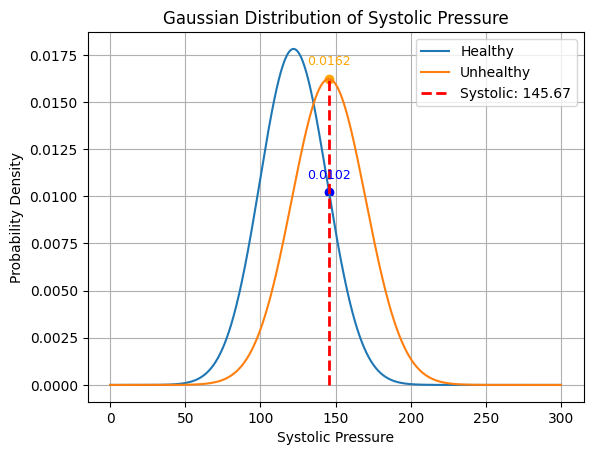

In [ ]:
# Generate data for plotting Gaussian distributions
x = np.linspace(0, 300, 1000)  # Assuming Systolic Pressure range
y_systolic_healthy = (1/(std_healthy_systolic * np.sqrt(2 * np.pi))) * np.exp(-(x - mean_healthy_systolic)**2 / (2 * std_healthy_systolic**2))
y_systolic_unhealthy = (1/(std_non_healthy_systolic * np.sqrt(2 * np.pi))) * np.exp(-(x - mean_non_healthy_systolic)**2 / (2 * std_non_healthy_systolic**2))

y_systolic_healthy_ins = (1/(std_healthy_systolic * np.sqrt(2 * np.pi))) * np.exp(-(instance[0] - mean_healthy_systolic)**2 / (2 * std_healthy_systolic**2))
y_systolic_unhealthy_ins = (1/(std_non_healthy_systolic * np.sqrt(2 * np.pi))) * np.exp(-(instance[0] - mean_non_healthy_systolic)**2 / (2 * std_non_healthy_systolic**2))

plt.plot(x, y_systolic_healthy, label='Healthy')
plt.plot(x, y_systolic_unhealthy, label='Unhealthy')

plt.scatter(instance[0], y_systolic_healthy_ins, color='blue', marker='o')
plt.scatter(instance[0], y_systolic_unhealthy_ins, color='orange', marker='o')

plt.plot([instance[0], instance[0]], [0, max(y_systolic_healthy_ins, y_systolic_unhealthy_ins)], "r--", label= 'Systolic: ' + str(instance[0]), linewidth=2)

# Annotating points with their y-values
plt.annotate(f'{y_systolic_healthy_ins:.4f}', (instance[0], y_systolic_healthy_ins), textcoords="offset points", xytext=(0,10), ha='center', fontsize=9, color='blue')
plt.annotate(f'{y_systolic_unhealthy_ins:.4f}', (instance[0], y_systolic_unhealthy_ins), textcoords="offset points", xytext=(0,10), ha='center', fontsize=9, color='orange')

plt.title('Gaussian Distribution of Systolic Pressure')
plt.xlabel('Systolic Pressure')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

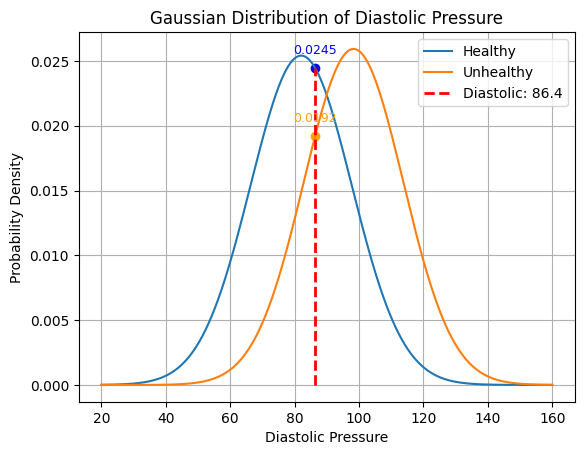

In [ ]:
# Generate data for plotting Gaussian distributions
x = np.linspace(20, 160, 1000)  # Assuming diastolic Pressure range
y_diastolic_healthy = (1/(std_healthy_diastolic * np.sqrt(2 * np.pi))) * np.exp(-(x - mean_healthy_diastolic)**2 / (2 * std_healthy_diastolic**2))
y_diastolic_unhealthy = (1/(std_non_healthy_diastolic * np.sqrt(2 * np.pi))) * np.exp(-(x - mean_non_healthy_diastolic)**2 / (2 * std_non_healthy_diastolic**2))

y_diastolic_healthy_ins = (1/(std_healthy_diastolic * np.sqrt(2 * np.pi))) * np.exp(-(instance[1] - mean_healthy_diastolic)**2 / (2 * std_healthy_diastolic**2))
y_diastolic_unhealthy_ins = (1/(std_non_healthy_diastolic * np.sqrt(2 * np.pi))) * np.exp(-(instance[1] - mean_non_healthy_diastolic)**2 / (2 * std_non_healthy_diastolic**2))

plt.plot(x, y_diastolic_healthy, label='Healthy')
plt.plot(x, y_diastolic_unhealthy, label='Unhealthy')

plt.scatter(instance[1], y_diastolic_healthy_ins, color='blue', marker='o')
plt.scatter(instance[1], y_diastolic_unhealthy_ins, color='orange', marker='o')

plt.plot([instance[1], instance[1]], [0, max(y_diastolic_healthy_ins, y_diastolic_unhealthy_ins)], "r--", label= 'Diastolic: ' + str(instance[1]), linewidth=2)

# Annotating points with their y-values
plt.annotate(f'{y_diastolic_healthy_ins:.4f}', (instance[1], y_diastolic_healthy_ins), textcoords="offset points", xytext=(0,10), ha='center', fontsize=9, color='blue')
plt.annotate(f'{y_diastolic_unhealthy_ins:.4f}', (instance[1], y_diastolic_unhealthy_ins), textcoords="offset points", xytext=(0,10), ha='center', fontsize=9, color='orange')

plt.title('Gaussian Distribution of Diastolic Pressure')
plt.xlabel('Diastolic Pressure')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

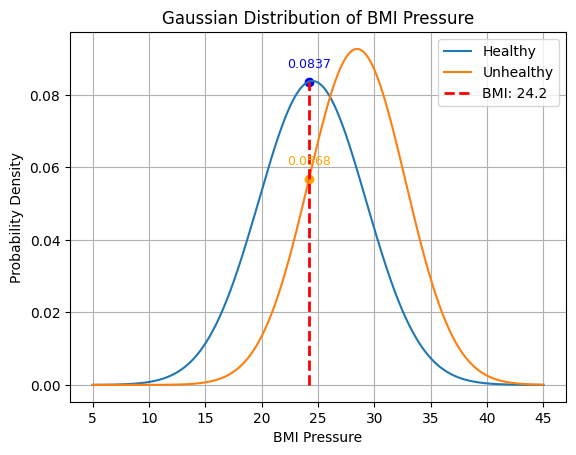

In [ ]:
# Generate data for plotting Gaussian distributions
x = np.linspace(5, 45, 1000)  # Assuming BMI Pressure range
y_bmi_healthy = (1/(std_healthy_bmi * np.sqrt(2 * np.pi))) * np.exp(-(x - mean_healthy_bmi)**2 / (2 * std_healthy_bmi**2))
y_bmi_unhealthy = (1/(std_non_healthy_bmi * np.sqrt(2 * np.pi))) * np.exp(-(x - mean_non_healthy_bmi)**2 / (2 * std_non_healthy_bmi**2))

y_bmi_healthy_ins = (1/(std_healthy_bmi * np.sqrt(2 * np.pi))) * np.exp(-(instance[2] - mean_healthy_bmi)**2 / (2 * std_healthy_bmi**2))
y_bmi_unhealthy_ins = (1/(std_non_healthy_bmi * np.sqrt(2 * np.pi))) * np.exp(-(instance[2] - mean_non_healthy_bmi)**2 / (2 * std_non_healthy_bmi**2))

plt.plot(x, y_bmi_healthy, label='Healthy')
plt.plot(x, y_bmi_unhealthy, label='Unhealthy')

plt.scatter(instance[2], y_bmi_healthy_ins, color='blue', marker='o')
plt.scatter(instance[2], y_bmi_unhealthy_ins, color='orange', marker='o')

plt.plot([instance[2], instance[2]], [0, max(y_bmi_healthy_ins, y_bmi_unhealthy_ins)], "r--", label= 'BMI: ' + str(instance[2]), linewidth=2)

# Annotating points with their y-values
plt.annotate(f'{y_bmi_healthy_ins:.4f}', (instance[2], y_bmi_healthy_ins), textcoords="offset points", xytext=(0,10), ha='center', fontsize=9, color='blue')
plt.annotate(f'{y_bmi_unhealthy_ins:.4f}', (instance[2], y_bmi_unhealthy_ins), textcoords="offset points", xytext=(0,10), ha='center', fontsize=9, color='orange')

plt.title('Gaussian Distribution of BMI Pressure')
plt.xlabel('BMI Pressure')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

***Support Vector Classifier***

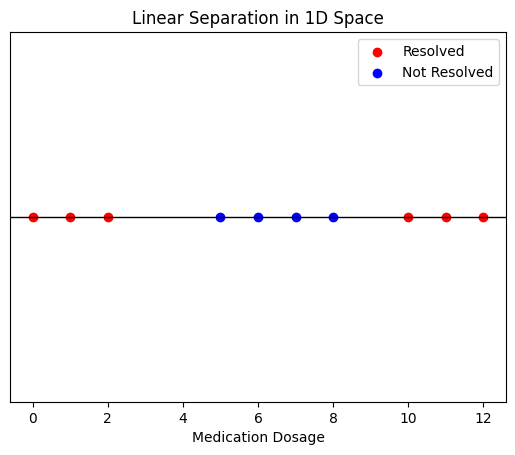

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate two classes
class1 = [0, 1, 2, 10, 11, 12]
class2 = [5, 6, 7, 8]

# Plot the data points
plt.scatter(class1, np.zeros_like(class1), color='red', label='Resolved')
plt.scatter(class2, np.zeros_like(class2), color='blue', label='Not Resolved')

# Draw a horizontal line at y = 0
plt.axhline(y=0, color='black', linestyle='-', linewidth=1)

# Set plot labels and legend
plt.xlabel('Medication Dosage')
plt.title('Linear Separation in 1D Space')
plt.legend()

# Remove y-axis ticks
plt.yticks([])

# Show the plot
plt.show()

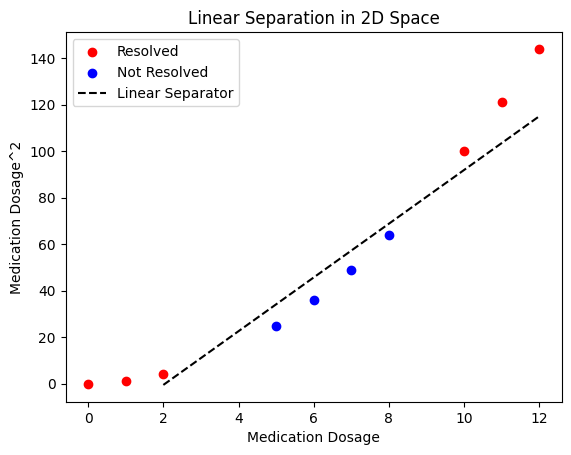

In [ ]:
# Generate two classes
class1 = [0, 1, 2, 10, 11, 12]
class2 = [5, 6, 7, 8]

# Plot the data points
plt.scatter(class1, np.square(class1), color='red', label='Resolved')
plt.scatter(class2, np.square(class2), color='blue', label='Not Resolved')


# Plot a linear line (point) as a separator
plt.plot([2, 12], [-0.5,115], linestyle='--', color='black', label='Linear Separator')

# Set plot labels and legend
plt.ylabel('Medication Dosage^2')
plt.xlabel('Medication Dosage')
plt.title('Linear Separation in 2D Space')
plt.legend()

# Show the plot
plt.show()

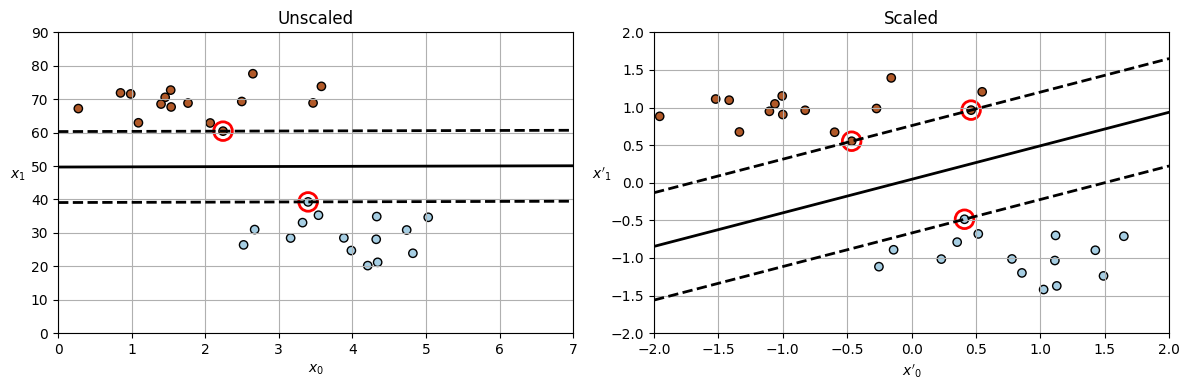

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

def plot_svc_decision_boundary(svm_classifier, xmin, xmax):
    w = svm_classifier.coef_[0]
    b = svm_classifier.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_classifier.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='none', edgecolors='r', linewidths=2)
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

# Generate 30 random data points with more noticeable separation
np.random.seed(42)
Xs = np.vstack([np.random.normal(loc=[2, 70], scale=[1, 5], size=(15, 2)),
                np.random.normal(loc=[4, 30], scale=[1, 5], size=(15, 2))])
ys = np.array([1] * 15 + [0] * 15)

# Train SVM without scaling
svm_clf = SVC(kernel="linear", C=100).fit(Xs, ys)

# Train SVM with scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf_scaled = SVC(kernel="linear", C=100).fit(X_scaled, ys)

# Plotting
plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.scatter(Xs[:, 0], Xs[:, 1], c=ys, cmap=plt.cm.Paired, marker='o', edgecolors='k')
plot_svc_decision_boundary(svm_clf, 0, 7)
plt.xlabel("$x_0$")
plt.ylabel("$x_1$    ", rotation=0)
plt.title("Unscaled")
plt.axis([0, 7, 0, 90])
plt.grid()

plt.subplot(122)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=ys, cmap=plt.cm.Paired, marker='o', edgecolors='k')
plot_svc_decision_boundary(svm_clf_scaled, -2, 2)
plt.xlabel("$x'_0$")
plt.ylabel("$x'_1$  ", rotation=0)
plt.title("Scaled")
plt.axis([-2, 2, -2, 2])
plt.grid()

plt.tight_layout()
plt.show()

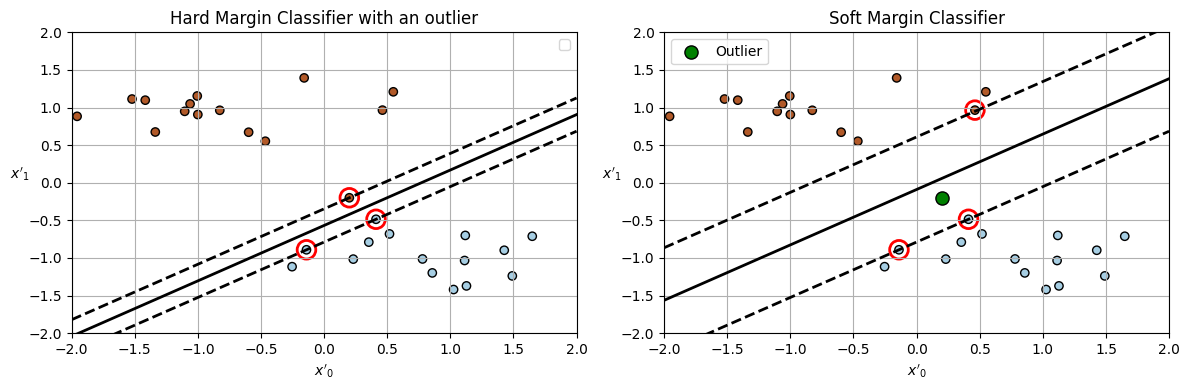

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

def plot_svc_decision_boundary(svm_classifier, X, y, xmin, xmax, outlier=None):
    w = svm_classifier.coef_[0]
    b = svm_classifier.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_classifier.support_vectors_


    if outlier is not None:
        plt.scatter(outlier[0], outlier[1], s=90, marker='o', c='g', edgecolors='k', label='Outlier')
        plt.scatter(svs[0:2, 0], svs[0:2, 1], s=180, facecolors='none', edgecolors='r', linewidths=2)
    else:
        plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='none', edgecolors='r', linewidths=2)

    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

# Generate 30 random data points with more noticeable separation
np.random.seed(42)
Xs = np.vstack([np.random.normal(loc=[2, 70], scale=[1, 5], size=(15, 2)),
                np.random.normal(loc=[4, 30], scale=[1, 5], size=(15, 2))])
ys = np.array([1] * 15 + [0] * 15)

# Add an outlier to the blue class in the scaled version
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
X_scaled[0] = [0.2, -0.2]  # Adding an outlier

svm_clf_scaled = SVC(kernel="linear", C=100).fit(X_scaled, ys)
svm_clf_scaled_better = SVC(kernel="linear", C=5).fit(X_scaled, ys)

# Plotting
plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=ys, cmap=plt.cm.Paired, marker='o', edgecolors='k')
plot_svc_decision_boundary(svm_clf_scaled, X_scaled, ys, -2, 2)
plt.xlabel("$x'_0$")
plt.ylabel("$x'_1$  ", rotation=0)
plt.title("Hard Margin Classifier with an outlier")
plt.axis([-2, 2, -2, 2])
plt.legend()
plt.grid()

plt.subplot(122)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=ys, cmap=plt.cm.Paired, marker='o', edgecolors='k')
plt.scatter(X_scaled[10, 0], X_scaled[10, 1], s=180, facecolors='none', edgecolors='r', linewidths=2)
plot_svc_decision_boundary(svm_clf_scaled_better, X_scaled, ys, -2, 2, outlier=X_scaled[0])
plt.xlabel("$x'_0$")
plt.ylabel("$x'_1$  ", rotation=0)
plt.title("Soft Margin Classifier")
plt.axis([-2, 2, -2, 2])
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

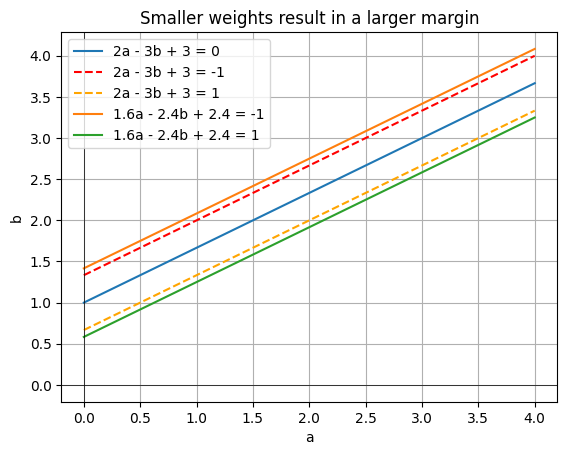

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range of values for 'a'
a_values = np.linspace(0, 4, 400)

# Compute corresponding 'b' values for each equation
b_values_eq1 = (2 * a_values + 3) / 3
b_values_eq2 = (2 * a_values + 4) / 3
b_values_eq3 = (2 * a_values + 2) / 3

# Plot the lines
plt.plot(a_values, b_values_eq1, label='2a - 3b + 3 = 0')
plt.plot(a_values, b_values_eq2, label='2a - 3b + 3 = -1', linestyle='dashed', color='red')
plt.plot(a_values, b_values_eq3, label='2a - 3b + 3 = 1', linestyle='dashed', color='orange')

# Compute corresponding 'b' values for each equation
b_values_eq4 = (1.6 * a_values + 3.4) / 2.4
b_values_eq5 = (1.6 * a_values + 1.4) / 2.4

plt.plot(a_values, b_values_eq4, label='1.6a - 2.4b + 2.4 = -1')
plt.plot(a_values, b_values_eq5, label='1.6a - 2.4b + 2.4 = 1')

# Add labels and legend
plt.xlabel('a')
plt.ylabel('b')
plt.title('Smaller weights result in a larger margin')
plt.legend()

# Show the plot
plt.grid(True)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.show()

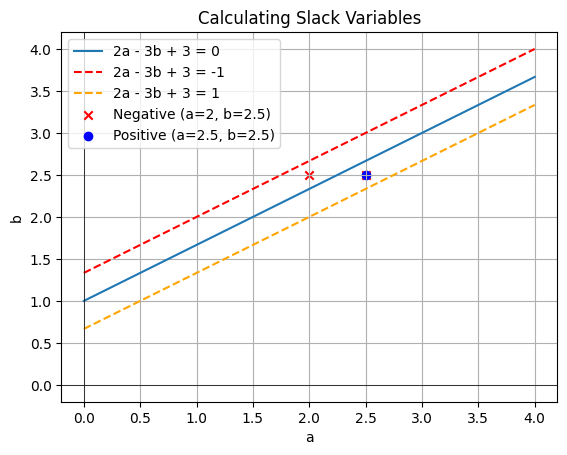

Hinge loss for Instance 1: 0.5
Hinge loss for Instance 2: 0.5


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range of values for 'a'
a_values = np.linspace(0, 4, 400)

# Compute corresponding 'b' values for each equation
b_values_eq1 = (2 * a_values + 3) / 3
b_values_eq2 = (2 * a_values + 4) / 3
b_values_eq3 = (2 * a_values + 2) / 3

# Plot the lines
plt.plot(a_values, b_values_eq1, label='2a - 3b + 3 = 0')
plt.plot(a_values, b_values_eq2, label='2a - 3b + 3 = -1', linestyle='dashed', color='red')
plt.plot(a_values, b_values_eq3, label='2a - 3b + 3 = 1', linestyle='dashed', color='orange')

# Add labels and legend
plt.xlabel('a')
plt.ylabel('b')
plt.title('Calculating Slack Variables')
plt.legend()

# Add instances
plt.scatter([2, 2.5], [2.5, 2.5], color='red', marker='x', label='Negative (a=2, b=2.5)')
plt.scatter([2.5], [2.5], color='blue', marker='o', label='Positive (a=2.5, b=2.5)')

# Show the plot
plt.grid(True)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.legend()
plt.show()

# Define the hinge loss function
def hinge_loss(y_true, y_pred):
    return max(0, 1 - y_true * y_pred)

# Calculate hinge loss for instance 1
a_instance1 = 2
b_instance1 = 2.5
y_true_instance1 = -1  # Since we want to compare it with the red dashed line, which is for the equation 2a - 3b + 3 = -1
f_instance1 = 2 * a_instance1 - 3 * b_instance1 + 3  # Value of the red dashed line at the point (a_instance1, b_instance1)
hinge_loss_instance1 = hinge_loss(y_true_instance1, f_instance1)

# Calculate hinge loss for instance 2
a_instance2 = 2.5
b_instance2 = 2.5
y_true_instance2 = 1  # Since we want to compare it with the orange dashed line, which is for the equation 2a - 3b + 3 = 1
f_instance2 = 2 * a_instance2 - 3 * b_instance2 + 3  # Value of the orange dashed line at the point (a_instance2, b_instance2)
hinge_loss_instance2 = hinge_loss(y_true_instance2, f_instance2)

print("Hinge loss for Instance 1:", hinge_loss_instance1)
print("Hinge loss for Instance 2:", hinge_loss_instance2)

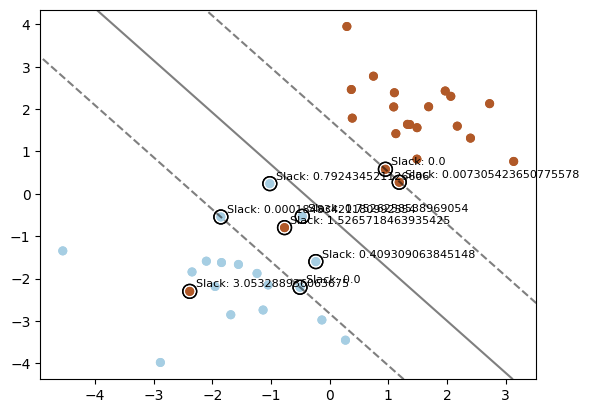

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Generate some example data
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
#Y = [0] * 20 + [1] * 20
Y = [0] * 18 + [1] * 22  # introducing misclassifications

# Train the SVM model
clf = svm.SVC(kernel='linear', C=1)
clf.fit(X, Y)

# Plot the decision function
plt.scatter(X[:, 0], X[:, 1], c=Y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')

# Convert labels to -1 and 1
t = [1 if x == 1 else -1 for x in Y]

# Get indices of support vectors
support_indices = clf.support_

slacks = []

# Iterate over all support vectors
for i in range(len(support_indices)):
    # Calculate distance from decision boundary
    dist = t[support_indices[i]] * clf.decision_function(X[[support_indices[i]], :])
    # Calculate slack
    slack = np.maximum(0, 1 - dist)
    slacks.append(slack)

# Plot support vectors and their slack variables
plt.scatter(X[:, 0], X[:, 1], c=Y, s=30, cmap=plt.cm.Paired)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')

for i in range(len(support_indices)):
    plt.text(X[support_indices[i], 0] + 0.1, X[support_indices[i], 1] + 0.1, f'Slack: {slacks[i][0]}', fontsize=8)

plt.show()

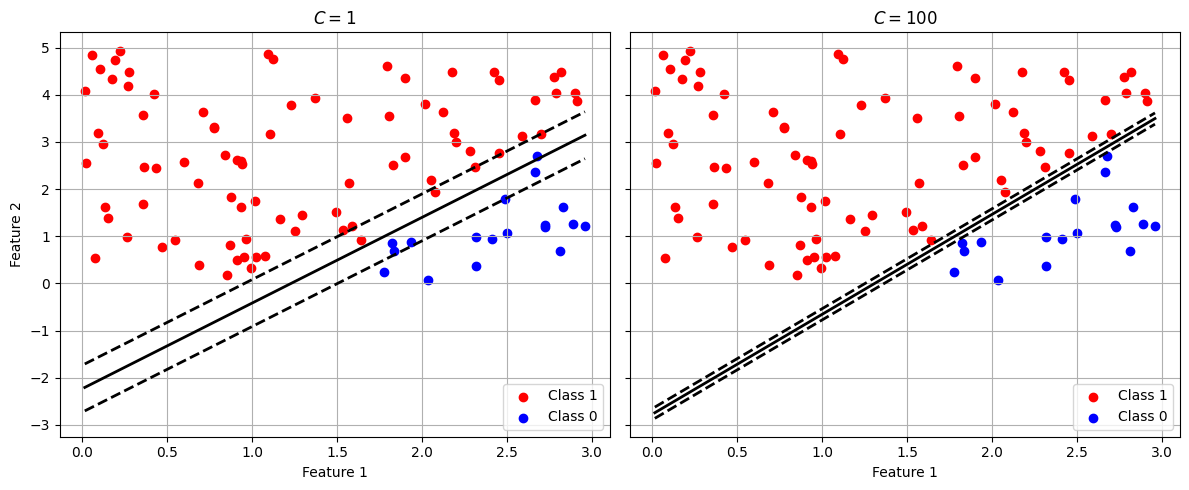

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

def plot_svc_decision_boundary(svm_model, xmin, xmax):
    w = svm_model.coef_[0]
    b = svm_model.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0] / w[1] * x0 - b / w[1]

    margin = 1 / np.sqrt(np.sum(w ** 2))
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

# Generate synthetic data with better separability
np.random.seed(42)
X = np.random.rand(100, 2) * [3, 5]  # Adjust the scale to make it more similar to the Iris dataset
y = (X[:, 1] > 2*X[:, 0] - 2.5).astype(int)

# Create SVM models with different values of C
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, max_iter=10_000, dual=True, random_state=42)
svm_clf2 = LinearSVC(C=100, max_iter=10_000, dual=True, random_state=42)

scaled_svm_clf1 = make_pipeline(scaler, svm_clf1)
scaled_svm_clf2 = make_pipeline(scaler, svm_clf2)

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

# Convert to unscaled parameters
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# Find support vectors (LinearSVC does not do this automatically)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

plt.sca(axes[0])
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], c='red', marker='o', label="Class 1")
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], c='blue', marker='o', label="Class 0")
plot_svc_decision_boundary(svm_clf1, X[:, 0].min(), X[:, 0].max())
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title(f"$C = {svm_clf1.C}$")
plt.legend()
plt.grid()

plt.sca(axes[1])
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], c='red', marker='o', label="Class 1")
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], c='blue', marker='o', label="Class 0")
plot_svc_decision_boundary(svm_clf2, X[:, 0].min(), X[:, 0].max())
plt.xlabel("Feature 1")
plt.title(f"$C = {svm_clf2.C}$")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()